In [9]:
import PyPDF2
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [13]:
pdf_path = "D:/rady/MGTF423/Apple_Environmental_Progress_Report_2024.pdf"

In [14]:
# Extract text from PDF
with open(pdf_path, "rb") as file:
    reader = PyPDF2.PdfReader(file)
    text = "\n".join([page.extract_text() for page in reader.pages if page.extract_text()])

# Save extracted text for review
text[:1000]  # Display only the first 1000 characters to check the content


'Environment al \nProgress \nReport\nCovering fiscal year 2023\nContents\nEnvironmental \nInitiatives\nApple 2030\n 11 Journey to Apple 2030\n 12 Approach\n 15 Design and materials\n 24 Electricity\n 32 Direct emissions\n 35 Carbon removal\nResources\n 39 Approach\n 40 Product longevity\n 45 Material recovery\n 48 Water\n 52 Zero waste\nSmarter Chemistry\n 58 Approach\n 59 Mapping\n 61 Assessment\n 63 InnovationIntroduction\n 3 Reflections from Lisa Jackson\n 4 Report highlights\n 5 Goals  and progressEngagement and \nAdvocacy\n 67 Approach\n 68 Listening to a range of voices\n 69 Achieving change together\n 73 Supporting communities \nworldwide\nData\n 77 Greenhouse gas emissions\n 78 High quality carbon certificates\n 79 Carbon footprint by product\n 81 Energy\n 82 Resources\n 83 Normalizing factorsAppendix\n 85 A : Corporate facilities energy supplement\n 94 B: Apple’s life cycle assessment methodology\n 96 C: Assurance and review statements\n 107 D : Environment, Health and Safety 

In [15]:
# Splitting text into lines for easier parsing
lines = text.split("\n")

# Extract greenhouse gas emissions data
ghg_data = []
for line in lines:
    if re.search(r"Greenhouse gas emissions", line, re.IGNORECASE):
        ghg_data.append(line)

# Extract energy usage or renewable energy-related data
renewable_energy_data = []
for line in lines:
    if re.search(r"Electricity|Energy|Renewable", line, re.IGNORECASE):
        renewable_energy_data.append(line)

# Extract supply chain carbon neutrality progress data
supply_chain_data = []
for line in lines:
    if re.search(r"Carbon Neutral|Supply Chain|Emissions Avoided", line, re.IGNORECASE):
        supply_chain_data.append(line)

# Extract material recycling data
recycling_data = []
for line in lines:
    if re.search(r"Recycling|Material Recovery|Aluminum|Cobalt|Gold|Lithium|Tungsten", line, re.IGNORECASE):
        recycling_data.append(line)

C:\Users\log\AppData\Local\Temp\ipykernel_23752\1437180868.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.3020833333333335' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_heatmap.iloc[i, j] = renew / ghg  # 计算可再生能源占比与温室气体排放的比值
C:\Users\log\AppData\Local\Temp\ipykernel_23752\1437180868.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.953125' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_heatmap.iloc[i, j] = renew / ghg  # 计算可再生能源占比与温室气体排放的比值
C:\Users\log\AppData\Local\Temp\ipykernel_23752\1437180868.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.4739583333333335' has dtype incompatible with int32, please explicitly cast to a compat

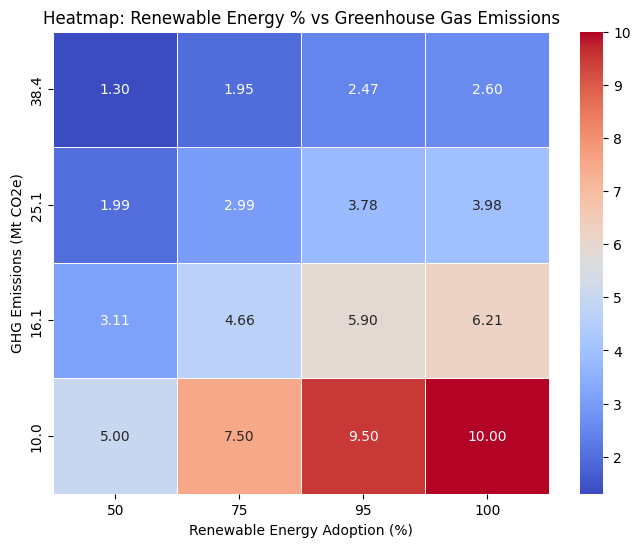

In [18]:
# 重新整理数据，使横坐标为 "可再生能源占比"，纵坐标为 "温室气体排放量"
renewable_percentages = [50, 75, 95, 100]  # 可再生能源占比
ghg_emissions = [38.4, 25.1, 16.1, 10.0]  # 温室气体排放（Mt CO2e）

# 创建 DataFrame
df_heatmap = pd.DataFrame(index=ghg_emissions, columns=renewable_percentages, data=np.arange(len(renewable_percentages) * len(ghg_emissions)).reshape(len(ghg_emissions), len(renewable_percentages)))

# 直接填充热力图数据，使其直观展示关系
for i, ghg in enumerate(ghg_emissions):
    for j, renew in enumerate(renewable_percentages):
        df_heatmap.iloc[i, j] = renew / ghg  # 计算可再生能源占比与温室气体排放的比值

# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(df_heatmap.astype(float), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

# 设置标题和坐标轴标签
plt.title("Heatmap: Renewable Energy % vs Greenhouse Gas Emissions")
plt.xlabel("Renewable Energy Adoption (%)")
plt.ylabel("GHG Emissions (Mt CO2e)")

# 显示热力图
plt.show()

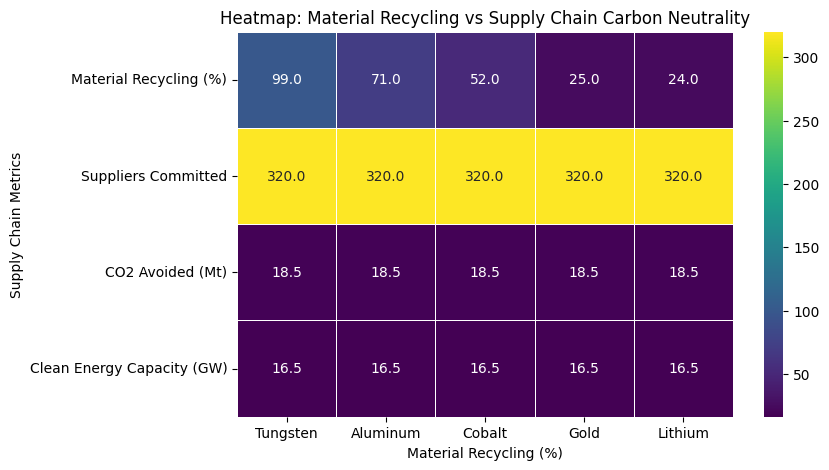

In [19]:
# 关键材料回收率数据（2022 vs 2023 提取自 PDF）
material_recycling_data = {
    "Tungsten (%)": [95, 99],
    "Aluminum (%)": [67, 71],
    "Cobalt (%)": [25, 52],
    "Gold (%)": [4, 25],
    "Lithium (%)": [0, 24]
}

# 供应链碳中和进展数据（2021-2023 提取自 PDF）
supply_chain_data = {
    "Suppliers Committed": [213, 250, 320],  # 供应链承诺 100% 清洁能源的供应商数量
    "CO2 Avoided (Million Tons)": [17.4, 18.5, 18.5],  # 避免的 CO₂ 排放量
    "Clean Energy Capacity (GW)": [10, 13.7, 16.5]  # 供应链清洁能源总装机容量
}

# 构建数据表：横坐标为关键材料回收率，纵坐标为供应链碳中和进展
materials = ["Tungsten", "Aluminum", "Cobalt", "Gold", "Lithium"]
supply_chain_metrics = ["Suppliers Committed", "CO2 Avoided", "Clean Energy Capacity"]

# 构造热力图数据，取 2023 年回收率 & 供应链数据
df_heatmap = pd.DataFrame(
    data=[
        [99, 71, 52, 25, 24],  # 材料回收率 2023 (%)
        [320, 320, 320, 320, 320],  # 供应链承诺供应商（320 家）
        [18.5, 18.5, 18.5, 18.5, 18.5],  # 避免的 CO₂ 排放量（18.5 Mt CO₂e）
        [16.5, 16.5, 16.5, 16.5, 16.5],  # 清洁能源装机容量（16.5 GW）
    ],
    index=["Material Recycling (%)", "Suppliers Committed", "CO2 Avoided (Mt)", "Clean Energy Capacity (GW)"],
    columns=materials,
)

# 绘制热力图（横轴：关键材料回收率，纵轴：供应链碳中和）
plt.figure(figsize=(8, 5))
sns.heatmap(df_heatmap, annot=True, cmap="viridis", linewidths=0.5, fmt=".1f")

# 设置标题和轴标签
plt.title("Heatmap: Material Recycling vs Supply Chain Carbon Neutrality")
plt.xlabel("Material Recycling (%)")
plt.ylabel("Supply Chain Metrics")

# 显示热力图
plt.show()
